## Black-Scholes Model

The Black-Scholes equation is used to model the price evolution of European call and put options and derives from the no-arbitrage condition in a continous time,continous state market

- European Call Option are a financial derivative that gives the buyer the right but not the pobnlligation to buy a stock or other asset at a specified price (strike price) on a specific date(expiration date)

- European option are different to American option because they can only be exercised on the expiration date compared to American ones that can be exercised any time before expiration

- A no arbitrage condition is essentially stating that equivalent assets should sell for the same price to prevent a risk free profit from simply buying and sellling them(arbitrage).Black-Scholes model assumes there are no oppurtunities to make risk free profits through simple buying and selling strategies

- Continuous Time,Continous State Market assumes that tradin happens continously over time and that the prices of the underlying assets can vary continuously.

Black-Scholes is derived from these assumptions.

### Black-Scholes Equation (PDE)

$$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS \frac{\partial V}{\partial S} - rV = 0
$$

$V$ - This is the price of the derivative.It represents the current theoretical value of the option based on other underlying variables

$t$ - Time until the option expires

$S$ - The current stock price 

$ \sigma$ - Representws the volatility of the stock price.A higher $\sigma$ means the stock is morre volatile.More volatile means the value of the option increases because of the higher risk.

$r$ - The risk free interest rate is the theoretical rate of return of an invesment with zero risk


#### Intuition

$ \frac{\partial V}{\partial t}$ - measures how the price of the option is expected to change as time moves closer to the options expiration.Also called the time decay of an option

$\frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2}$ - Represents how sensitive an option is to changes in the price of an underlying asset.It captured the effects of volatility by looking at the curvature of the option value with respect to the stock price changes

$rS \frac{\partial V}{\partial S}$- Represents the cost of holding the underlying asset, essentially rhe expected return on the stock multiplied by the options sensitivity to stock price changes

$-rV$ - Reprresents the cost of financing the position.it shows the decrease in option value to to the passage of time.It is the money you would theorretically learn iof you invested the money at the risk-free rate instead of holding the option

### Black-Scholes Formula
This is the specific solution to the Black-Scholes PDE that applies to European call and put options.This formula provides the closed-form expression which can be used to directly calculate the fair price of these options based on the inputs without needing to solve the DE.

The formulas for a European call option is : 
$$
C = S_0 N(d_1) - X e^{-rT} N(d_2)
$$
 
The formula for a European put option is given by:
$$
P = X e^{-rT} N(-d_2) - S_0 N(-d_1)
$$

$C,P$ - the call and put option prices repectively

$S_0$ - the current stock price

$X$ - the strike price

$T$ - time till expiration

$N()$ - is the cumulative distribution function for a standard normal distribuition

$d_1$,$d_2$ - the intermediate calculations based on other variables

The formulas for d_1 and d_2 in the Black-Scholes model are given by:

$$ d_1 = \frac{\log(\frac{S_0}{X}) + (r + \frac{\sigma^2}{2})T}{\sigma \sqrt{T}} $$

$$ d_2 = d_1 - \sigma \sqrt{T} $$

where:

$\sigma$ - volatility of the stocks returns



#### Intuition
$S_0 N(d_1)$ - represents the expected benefit from purchasing the stock outright if the stock price exceeds the strike price at expiration. The N(d1) factor is like an expected value it weights the curent stock price by the likelihood the option will be in the money ie stock price is above the strike price at expiration

$X e^{-rT}$ - This term represents the present value of the strike price adjusted by the probability that the option will be exercised. The exponential term is about discounting, we need it to calculate the strike price' present value, how much it would be worth in the present day.r is the risk free interest rate and T isa the time to expirration.The exponent applies exponsntial decay to see how the money descreased in value over time ie discounting.

$ N(d_2)$ This cumalitive normal distribution provides a probability value.It gives us the probability that the option will be in the money.

#### What is the difference between N(d1) and N(d2)

$N(d1)$ - The probabilty the stock price $S_0$ will be above the strike price at the expiration date

$N(d2)$ - reprresents the probabily that the option will actually be exercised.Ie it will be profitable to exercise the option

additional note - the values of d1 and d2 are normalised so they are compatible with the standard normal distribution


### Defining Black-Scholes  Formula Function

In [1]:
import numpy as np
from scipy.stats import norm

In [22]:
def black_scholes(S,X,T,r,sigma,Otype):
    '''This function calculates the call price using the black scholes formula and known parameters'''
    #calculate d1,d2
    if Otype == 'call':
        d1 = ( np.log(S/X) + (r + (sigma**2 / 2))*T ) / ( sigma * np.sqrt(T))
        d2 = d1 - sigma*np.sqrt(T)
        call_price = S * norm.cdf(d1) - X * np.exp(-1*r*T) * norm.cdf(d2)
        return call_price
    if Otype == 'put':
        d1 = ( np.log(S/X) + (r + (sigma**2 / 2))*T ) / ( sigma * np.sqrt(T))
        d2 = d1 - sigma*np.sqrt(T)
        put_price = X * np.exp(-1*r*T) * norm.cdf(-1*d2) - S * norm.cdf(-1*d1)
        return put_price
    else: 
        return print('input option type correctly')


#### Simple Calculation

In [3]:
# Example parameters
S = 100       # current stock price
X = 100       # strike price
T = 1         # time to expiration (1 year)
r = 0.05      # risk-free rate (5% per year)
sigma = 0.2   # volatility (20%)

# Calculate call and put prices
call_price = black_scholes_call(S, X, T, r, sigma)
put_price = black_scholes_put(S, X, T, r, sigma)

print(f"Call Option Price: {call_price:.2f}")
print(f"Put Option Price: {put_price:.2f}")

Call Option Price: 10.45
Put Option Price: 5.57


## Estimating Call and Put prices using a Monte-Carlo Simulation

### Random Walk Hypothesis 
- The random walk hypothesis sugghests that stock prices evolve randomly and unpredicitibly over time.This is modelled using Geometric Brownian Motion (GBM) in the Black-Scholes framework.

### Geometric Brownian Motion
- GBM is used to model stock price dynamics because it captures the continous and stochastic nature of market movements.
- It is modelled by the formula below:
$$dS_t = \mu S_t \, dt + \sigma S_t \, dW_t$$

$dS_t$- represents the stock price at t time, this is our target value to simulate

$\mu$ - This is the drift of the stock price, it is the average expected return of the stok per unit of time.Essentially its the direction the stock price is expected to go on average

$\sigma$ - The volatility of the stock measures how much the stock price is expected to fluctuate around its mean or drift. A higher voolatility means the stock price can change drastically in a short period and vice versa.

$dW_t$ - The increment of Brownian motion which represents the random componant of stock price movements.A Browniant motion is a continous time stochastic process with independent normally distributed increments.

#### Intuition:
- The formula captures the predicitable trend using $\mu S_t \, dt  $ and the unpredictable spikes using $\sigma S_t \, dW_t$

### Log-Normal Distribution
- Stock prices modelled by GBM are said to be log-normally distributed ie , the stock price itself doesnt follow a normal distribution but the logarithm of the stock price does.This property comes from the exponential function in the GBM solution below

$$
S_T = S_0 \exp \left( \left( \mu - \frac{\sigma^2}{2} \right) T + \sigma T Z \right)
$$

where:

$S_0$ - Initial Stock Price

$Z$ - A random draw from a standard normal distribution which introduces the random variation in the simulation

$ \left( \mu - \frac{\sigma^2}{2} \right) T $ - Adjusts the ddrift to account for the volatility drag.A correction factor to pull mean of log normal distribution downwards

### Option Payoff
call option - Gives the holder the right to buy the asset at a strike price X.The payoff is the greater of zero or the difference between the stock price at expiration $S_t$ and the strike price 

put option - gives the holder the right to sell the asset at X.The payoff is zero or the differece between the strike price and ther stock price at expiration.

note: remember a call you want stock to go up, put you want stock to go down

### Expected Payoff and Discounting
- Under risk neutral valuation the expected return of a stock $\mu$ is replaced by the risk free rate r nbecause it is assumed that all investors are risk-neutral ie they dont need extra compensation for risk so like before the discounted expected payoff is :

$$\text{Present Value} = e^{-rT} \times \text{Expected Payoff at } T$$


- we take the constant value r rather than the variable $\mu$

### Monte Carlo Simulation

In [18]:
#### Define basic Parameters

S = 100 #Initial Stock Price
X = 100 #Strike Price
r = 0.03 #Risk Free rate
sigma = 0.4 # volatility
T = 1 # Time till expiration

# Simulate Stock prices at Expiration
rand = np.random.standard_normal(100)

In [19]:
def geo_brownian_motion(S,r,sigma,dt,Z):
    S_t = S * np.exp((r - (sigma**2)/2)*dt + sigma*np.sqrt(dt)*Z)
    return S_t


In [20]:
import matplotlib.pyplot as plt

def generate_dataset(S,r,sigma,datapoints,x):
    dt = np.diff(x) #time increments
    Z = np.random.standard_normal(size=len((dt))) #generrate set of Z
    S_t = S * np.ones(datapoints) #pre allocate memory
    for i in range(len(dt)):
        S_t[i+1] = geo_brownian_motion(S_t[i],r,sigma,dt[i],Z[i])
    return S_t


def Monte_Carlo_Simulation(S,r,sigma,T,datapoints,N,plot):
    
    x = np.linspace(0,T,datapoints)
    plot_data = np.zeros((N,datapoints))
    
    for i in range(N):
        plot_data[i] = generate_dataset(S,r,sigma,datapoints,x)

        
    
    if plot==True:
        plt.figure(figsize=(10,6))
        plt.title('MonteCarlo Simulation of Stock Price using GBM')
        plt.xlabel('Time/years')
        plt.ylabel('Stock Price/£')
        plt.grid()
        
        for data in plot_data:
            plt.plot(x,data)
            
            
        
    return plot_data

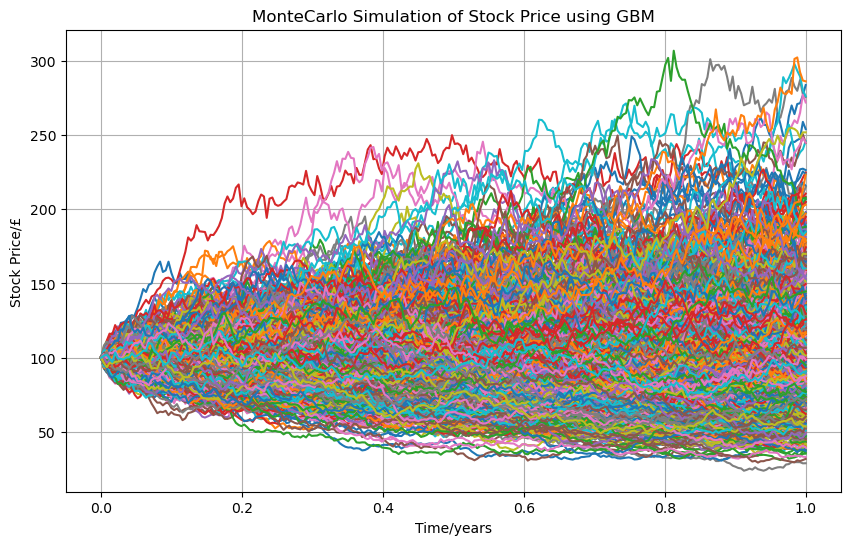

In [21]:
datasets = Monte_Carlo_Simulation(S,r,sigma,T,252,1000,True)

#### Calculate Payoff

In [15]:
def payoff(exp_prices,r,T,option_type):
    discount_factor = np.exp(-1*r*T)
    if option_type=='call':
        payoffs = np.maximum(exp_prices - X,0)*discount_factor
        return np.average(payoffs),payoffs
    if option_type=='put':
        payoffs = np.maximum(X - exp_prices,0)*discount_factor
        return np.average(payoffs),payoffs
    else:
        return print('input call or put type')

In [16]:
stock_exp_price = datasets[:,-1] #stock price at expiration each trial

In [17]:
payoff(stock_exp_price,r,T,'call')[0]

35.73201571468479

### Sensitivity Analysis - Greeks
The greeks are  financial measures of the sensitivity of an option's price to its underlying determining parameters like the price of the asset,time,volatility etc 
These are the most commonlty used Greeks:

1. Delta $\Delta$ - Measures the rate of change of the options price with respect to changes in the underlyin assets price ie how much the option price moves with a change in the underlying asset price
- for calls Delta ranges from 0 to 1 
- for puts Delta ranges from -1 to 0
- to calculate it :
$$\Delta \approx \frac{f(S + h) - f(S)}{h}$$

2. Gamma $\Gamma$ - measuires the rate of change of Delta with respect to changes in the the underlying asset price , essentially the second derivative .Gamma shows how stable an options Delta is 

3. Theta $\Theta$ - measures the sensitivity of the option price to the time passin(time decay).So it tells you how much the option price decreases as the option approaches expiration

4. Vega - Measures sensitivity to volatility.It is the amount the options price changes with a 1 percent change in volatility

5. Rho $\rho$ - measures the sensitivity of the option price to changes in the risk free interest rate.It shows how much the option price changes whenm the interest rate changes by 1 percent

#### Calculating the Each Greek 

In [40]:
#### for Black Scholes 
def BS_calculate_delta(S,X,T,r,sigma,Otype,h=0.01):
    '''Calculate the Delta of a call option using forward difference'''
    price_original = black_scholes(S,X,T,r,sigma,Otype)
    price_perturbed = black_scholes(S+h,X,T,r,sigma,Otype) 
    delta = (price_perturbed - price_original) / h
    return delta

def BS_calculate_gamma(S, X, T, r, sigma, Otype, h=0.01):
    '''Calculate the Gamma of an option using central difference'''
    price_plus = black_scholes(S + h, X, T, r, sigma, Otype)
    price_minus = black_scholes(S - h, X, T, r, sigma, Otype)
    price_original = black_scholes(S, X, T, r, sigma, Otype)
    gamma = (price_plus - 2 * price_original + price_minus) / (h ** 2)
    return gamma

    
def BS_calculate_theta(S,X,T,r,sigma,Otype,h=0.01):
    '''Calculate the Theta of a call option using backward direction'''
    price_original = black_scholes(S,X,T,r,sigma,Otype)
    price_perturbed = black_scholes(S,X,T-h,r,sigma,Otype) 
    theta = (price_perturbed - price_original) / h
    return theta

def BS_calculate_vega(S,X,T,r,sigma,Otype,h=0.01):
    '''Calculate the vega of a call option using forward difference'''
    price_original = black_scholes(S,X,T,r,sigma,Otype)
    price_perturbed = black_scholes(S,X,T,r,sigma+h,Otype) 
    vega = (price_perturbed - price_original) / h
    return vega

def BS_calculate_rho(S,X,T,r,sigma,Otype,h=0.01):
    '''Calculate the Delta of a call option'''
    price_original = black_scholes(S,X,T,r,sigma,Otype)
    price_perturbed = black_scholes(S,X,T,r+h,sigma,Otype) 
    rho = (price_perturbed - price_original) / h
    return rho

def BS_Greeks(S,X,T,r,sigma,Otype,h=0.01):
    delta = BS_calculate_delta(S,X,T,r,sigma,Otype,h)
    gamma = BS_calculate_gamma(S,X,T,r,sigma,Otype,h)
    theta = BS_calculate_theta(S,X,T,r,sigma,Otype,h)
    vega = BS_calculate_vega(S,X,T,r,sigma,Otype,h)
    rho = BS_calculate_rho(S,X,T,r,sigma,Otype,h)
    print(f'''
    The Greeks were calculated as follows:
    Delta: {delta:.2f}
    Gamma: {gamma:.2f}
    Theta: {theta:.2f}
    Vega: {vega:.2f}
    Rho: {rho:.2f}
    ''')
    

In [41]:
BS_Greeks(S,X,T,r,sigma,'call',h=0.01)


    The Greeks were calculated as follows:
    Delta: 0.61
    Gamma: 0.01
    Theta: -9.01
    Vega: 38.40
    Rho: 43.96
    


key Components:

    Understanding the Black-Scholes Model:
        Start with a theoretical understanding of the Black-Scholes equation. It’s a partial differential equation similar to those used in physics for describing systems in equilibrium.
        Learn about the financial interpretation of each term in the equation.

    Implementing the Model in Python:
        Write a Python function to calculate the price of a European call and put options using the Black-Scholes formula.
        Ensure you understand the inputs to the model: stock price, strike price, volatility, time to expiration, and risk-free interest rate.

    Monte Carlo Simulations:
        Implement a basic Monte Carlo simulation to estimate call and put prices. This involves simulating many possible future stock prices at the expiration of the option and averaging the payoffs.
        Explore how increasing the number of simulations affects the accuracy of the pricing.

    Sensitivity Analysis (Greeks):
        Calculate the "Greeks" which are derivatives of the option price with respect to various parameters (like delta, gamma, and theta). These measure the sensitivity of the option's price to changes in model inputs.
        Implement simple numerical differentiation to find these sensitivities.

    Visualizations:
        Use matplotlib or plotly to create graphs of how the option price changes with stock price, volatility, and time to expiration.
        Graph the Greeks against changes in inputs to help visualize their impact.

    Documentation and Testing:
        Document your code thoroughly to explain how each part of the model works.
        Write basic tests to check the correctness of the model calculations, using pytest.

Learning Outcomes:

    Gain a practical understanding of a key financial model using your coding skills.
    Learn to apply mathematical and computational techniques to solve problems in finance, similar to problems in physics.
    Develop skills in numerical analysis and simulations, important in both physics and finance.